In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
import os
from skimage.restoration import estimate_sigma
from sklearn.decomposition import PCA
import shutil

In [5]:
base_path="/mnt/c/Users/User/Documents/data/mat_data/"

In [6]:
data_dir = {}

for item in os.listdir(base_path):
    data_item = loadmat(os.path.join(base_path, item))
    data_dir[item] = data_item['PLRNN'][0][0]

In [7]:
data_dir['RAM_PLRNN_data_C_009_X28.mat'][3][0][0][0]

array([[array(['rewards_trai'], dtype='<U12')],
       [array(['rewards_test'], dtype='<U12')],
       [array(['rewards_cont'], dtype='<U12')],
       [array(['encode'], dtype='<U6')],
       [array(['retrieve_corr'], dtype='<U13')],
       [array(['walk'], dtype='<U4')],
       [array(['delay_test'], dtype='<U10')],
       [array(['delay_cont'], dtype='<U10')],
       [array(['score_presentation'], dtype='<U18')]], dtype=object)

In [8]:
data_dir['RAM_PLRNN_data_C_009_X28.mat'][3][0][0][0][0]

array([array(['rewards_trai'], dtype='<U12')], dtype=object)

In [9]:
data_dir['RAM_PLRNN_data_C_009_X28.mat'][3][0][0][1][0][0]

array([[ 142.516,  157.594,  190.078,  201.687,  215.391,  228.375,
         493.594,  506.328,  517.797,  536.516,  548.031,  568.297,
         847.703,  861.578,  873.   ,  885.875,  898.656,  910.297,
        1171.875, 1187.141, 1198.703, 1211.734, 1231.516, 1242.969]])

In [10]:
data_dir['RAM_PLRNN_data_C_009_X28.mat'][3][0][0][2][0][8]

array([[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]], dtype=uint8)

In [11]:
for item in data_dir['RAM_PLRNN_data_C_009_X28.mat'][3][0][0][2][0]:
    print(item.shape)

(1, 24)
(1, 24)
(1, 24)
(1, 24)
(1, 24)
(1, 24)
(1, 4)
(1, 4)
(1, 12)


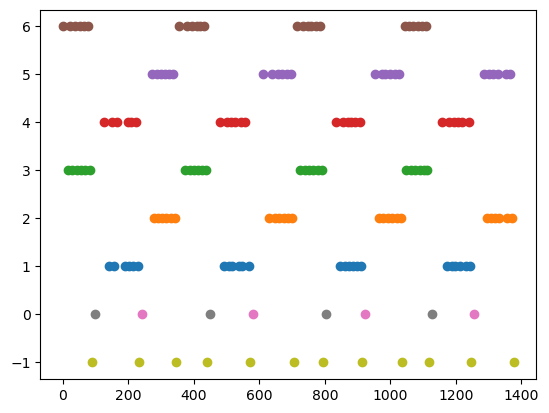

In [18]:
a = np.ones(24)

plt.scatter(data_dir['RAM_PLRNN_data_C_009_X28.mat'][3][0][0][1][0][0][0], a*1)

plt.scatter(data_dir['RAM_PLRNN_data_C_009_X28.mat'][3][0][0][1][0][1][0], a*2)

plt.scatter(data_dir['RAM_PLRNN_data_C_009_X28.mat'][3][0][0][1][0][2][0], a*3)

plt.scatter(data_dir['RAM_PLRNN_data_C_009_X28.mat'][3][0][0][1][0][3][0], a*4)

plt.scatter(data_dir['RAM_PLRNN_data_C_009_X28.mat'][3][0][0][1][0][4][0], a*5)

plt.scatter(data_dir['RAM_PLRNN_data_C_009_X28.mat'][3][0][0][1][0][5][0], a*6)

plt.scatter(data_dir['RAM_PLRNN_data_C_009_X28.mat'][3][0][0][1][0][6][0], np.zeros(4))

plt.scatter(data_dir['RAM_PLRNN_data_C_009_X28.mat'][3][0][0][1][0][7][0], np.zeros(4))

plt.scatter(data_dir['RAM_PLRNN_data_C_009_X28.mat'][3][0][0][1][0][8][0], np.ones(12)*(-1))

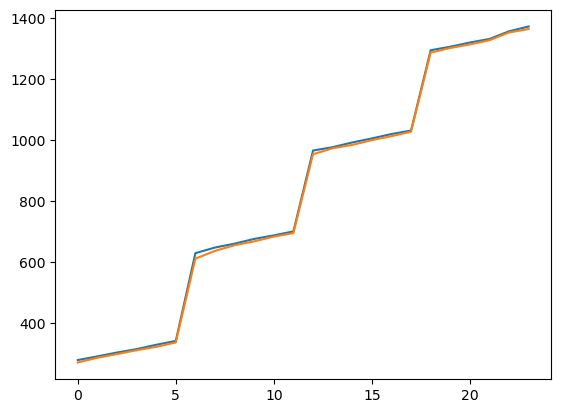

In [14]:
plt.plot(data_dir['RAM_PLRNN_data_C_009_X28.mat'][3][0][0][1][0][1][0])
plt.plot(data_dir['RAM_PLRNN_data_C_009_X28.mat'][3][0][0][1][0][4][0])

In [10]:
ts = data_dir['RAM_PLRNN_data_C_009_X28.mat'][4]

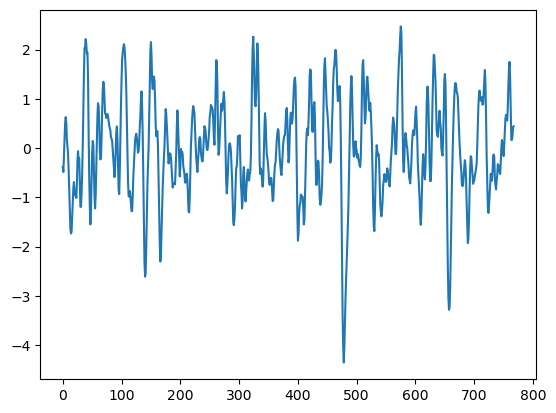

In [11]:
plt.plot(data_dir['RAM_PLRNN_data_C_009_X28.mat'][4][10])

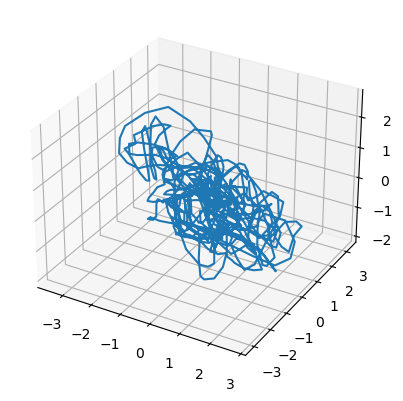

In [12]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(ts[2],ts[3], zs=ts[4])

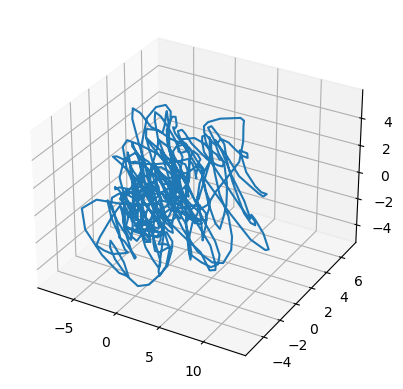

In [13]:
pca = PCA(n_components=3)
pca_ts = pca.fit_transform(ts.T).T

ax = plt.figure().add_subplot(projection='3d')

ax.plot(pca_ts[0],pca_ts[1], zs=pca_ts[2])

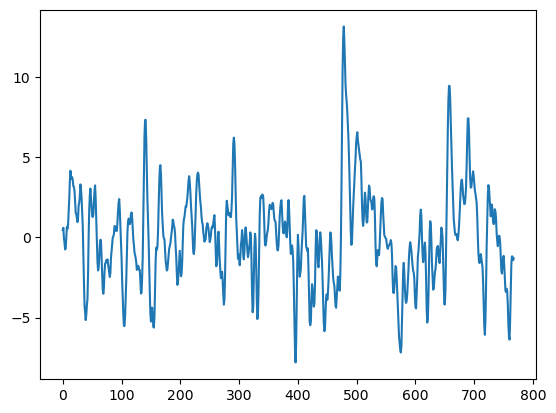

In [14]:
plt.plot(pca_ts[0])

In [15]:
sigmas = np.array([])

for key, item in data_dir.items():
    for ts in item[4]:
        sigmas = np.append(sigmas, estimate_sigma(ts))

(array([237., 538., 380., 112.,  55.,  23.,   8.,  11.,   6.,   2.]),
 array([0.01631813, 0.06078061, 0.10524309, 0.14970556, 0.19416804,
        0.23863052, 0.283093  , 0.32755548, 0.37201795, 0.41648043,
        0.46094291]),
 <BarContainer object of 10 artists>)

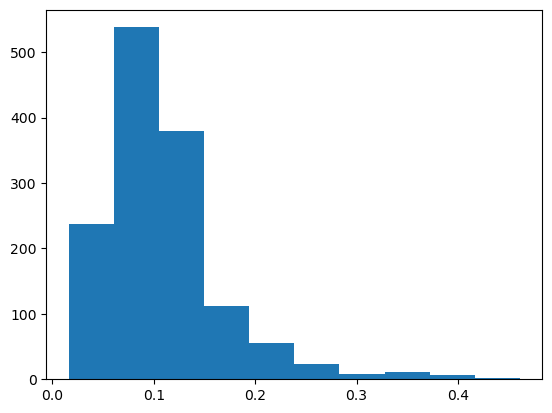

In [16]:
plt.hist(sigmas)

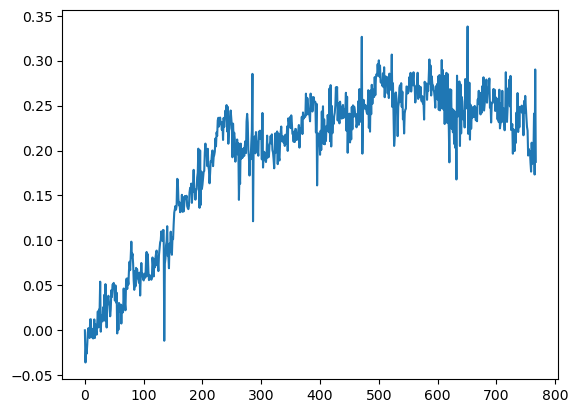

In [17]:
plt.plot(data_dir['RAM_PLRNN_data_C_009_X28.mat'][6][:,1])

NameError: name 'states' is not defined

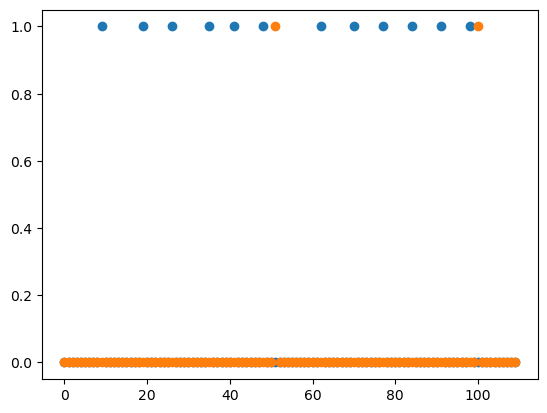

In [18]:
T = 450
t1 =340

plt.scatter(np.arange(T-t1), data_dir['RAM_PLRNN_data_C_009_X28.mat'][5][0,t1:T])
plt.scatter(np.arange(T-t1), data_dir['RAM_PLRNN_data_C_009_X28.mat'][5][1,t1:T])
plt.scatter(np.arange(T-t1), states[t1:T])

In [19]:
states = np.zeros(len( data_dir['RAM_PLRNN_data_C_009_X28.mat'][5][0]))


state = 0
t_rest = -100
for t in range(0, len(data_dir['RAM_PLRNN_data_C_009_X28.mat'][5][0])):
    
    if data_dir['RAM_PLRNN_data_C_009_X28.mat'][5][1,t] == 1:
        t_rest = t
    if t-t_rest==30:
        state+=1
    if t-t_rest<30:
        states[t] = -1
    else:
        states[t] = state % 3
        
    
    

In [20]:
54%18

0

In [29]:
states = np.zeros(len( data_dir['RAM_PLRNN_data_C_009_X28.mat'][5][0]))


state = 0
count = 0
for t in range(0, len(data_dir['RAM_PLRNN_data_C_009_X28.mat'][5][0])):
    
    s = np.sum(data_dir['RAM_PLRNN_data_C_009_X28.mat'][5][0, 0:t])
    states[t] = s
    
for t in range(1, len(states)):
    if states[t]%6==0:
        states[t]=0

for t in range(0, len(states)):
    if states[t]%18>0 and states[t]%18<=6:
        states[t] = 1
    if states[t]%18>6 and states[t]%18<=12:
        states[t] = 2
    if states[t]%18>12 and states[t]%18<=18:
        states[t] = 3

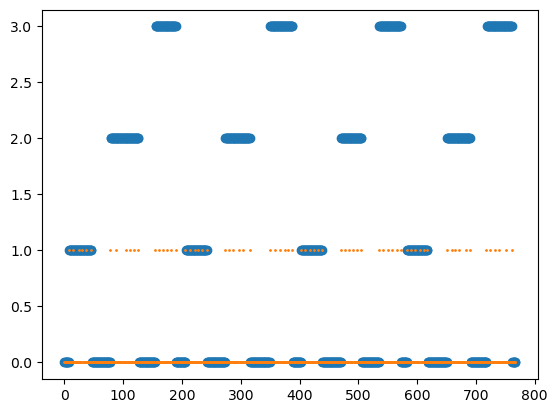

In [30]:

plt.scatter(np.arange(768), states%18)
plt.scatter(np.arange(768), data_dir['RAM_PLRNN_data_C_009_X28.mat'][5][0], s=1)


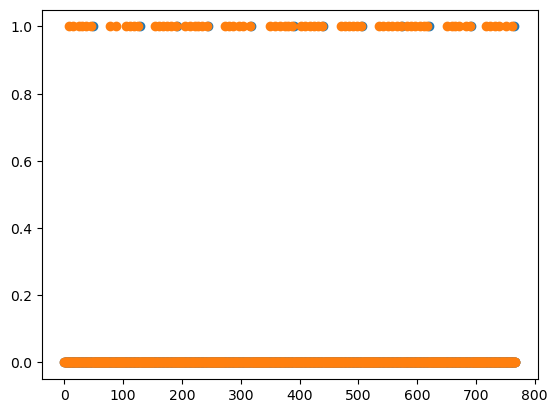

In [22]:
plt.scatter(np.arange(768), data_dir['RAM_PLRNN_data_C_009_X28.mat'][5][1])

plt.scatter(np.arange(768), data_dir['RAM_PLRNN_data_C_009_X28.mat'][5][0])

In [83]:
np.sum(data_dir['RAM_PLRNN_data_C_009_X28.mat'][5][1])

12

In [12]:
save_path = '/home/eric/src/bptt-julia-mri/example_data/patiant_data/'



for key, item in data_dir.items():
    pat_nr = item[0][0]
    group = item[1][0]
    data = item[4]
    inputs = item[5]
    
    path_data = os.path.join(save_path, group, 'data')
    path_inputs = os.path.join(save_path, group, 'inputs')

    
    np.save(os.path.join(path_data, pat_nr), data)
    np.save(os.path.join(path_inputs, pat_nr), inputs)
    
    print(pat_nr)

009
010
012
029
030
034
037
038
055
060
061
074
077
085
092
093
096
099
104
108
109
115
128
140
146
166
001
002
005
006
007
008
011
012
013
014
015
018
020
021
022
023
024
025
026
030
032
033
034


In [93]:
data_dir['RAM_PLRNN_data_C_009_X28.mat'][0][0]

'009'

In [96]:
data_dir['RAM_PLRNN_data_C_009_X28.mat'][1][0]

'C'

In [56]:
data_dir['RAM_PLRNN_data_C_009_X28.mat'][8][0][0][0][0][0]

1.8

In [126]:
data_dir['RAM_PLRNN_data_C_009_X28.mat'][5].shape

(2, 768)

In [125]:
data_dir['RAM_PLRNN_data_C_009_X28.mat'][4].shape

(28, 768)

In [95]:
for key, item in data_dir.items():
    pat_nr = item[0][0]
    group = item[1][0]
    data = item[4]
    inputs = item[5].T

True

In [29]:
data_dir['RAM_PLRNN_data_C_009_X28.mat'][4]

array([[ 0.13244333, -0.04866916, -0.1413016 , ...,  0.29337931,
         0.05807778, -0.00811264],
       [ 1.21969094,  1.51681653,  2.01572824, ...,  0.50411302,
         0.62722283,  0.7961575 ],
       [-0.25434841, -0.10233711,  0.23441345, ..., -1.19518131,
        -0.90838272, -0.62316997],
       ...,
       [ 0.0968331 ,  0.11930394, -0.02969558, ...,  0.36438577,
         0.16787635, -0.01191452],
       [ 0.75071377,  0.68949689,  0.25660888, ..., -2.21653815,
        -1.69821767, -1.10085114],
       [ 0.1034759 , -0.08981184,  0.06863107, ..., -0.0790239 ,
         0.02291845,  0.11248363]])

In [130]:
np.load("/home/eric/src/bptt-julia-mri/example_data/patiant_data/C/009/data.npy").shape

(28, 768)

In [131]:
np.load("/home/eric/src/bptt-julia-mri/example_data/patiant_data/C/009/inputs.npy").shape

(2, 768)

In [41]:
data = data_dir['RAM_PLRNN_data_C_009_X28.mat'][4].T

In [23]:
import umap

In [33]:
reducer = umap.UMAP(random_state=42, n_components=3)
mapper = reducer.fit(data.T)

In [34]:
data.shape

(28, 768)

In [35]:
embedding = reducer.transform(data.T)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(768, 3)

In [36]:
embedding.shape

(768, 3)

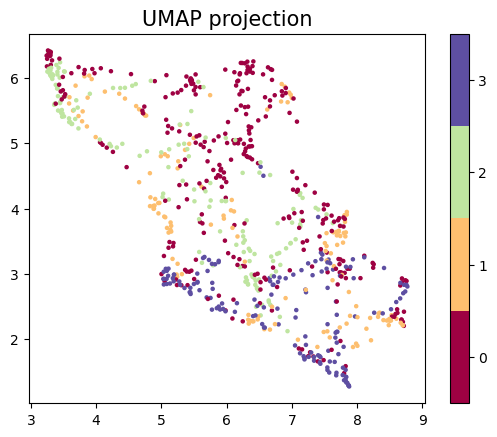

In [32]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=states.astype(int), s=5, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')

plt.colorbar(boundaries=np.arange(5)-0.5).set_ticks(np.arange(4))

plt.title('UMAP projection', fontsize=15);

In [57]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=states.astype(int), cmap='Spectral')
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=states.astype(int), cmap='Spectral')
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=states.astype(int), s=100, alpha=0.4, cmap='Spectral')
    plt.title(title, fontsize=18)

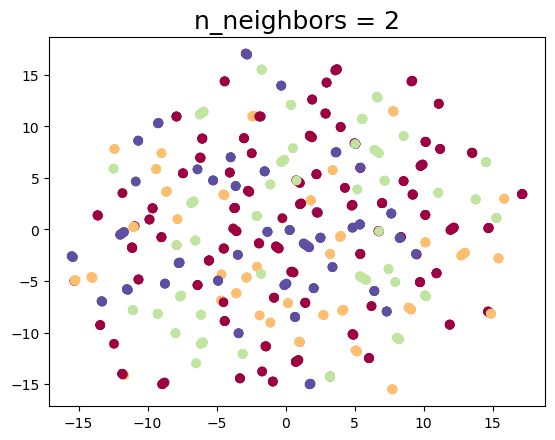

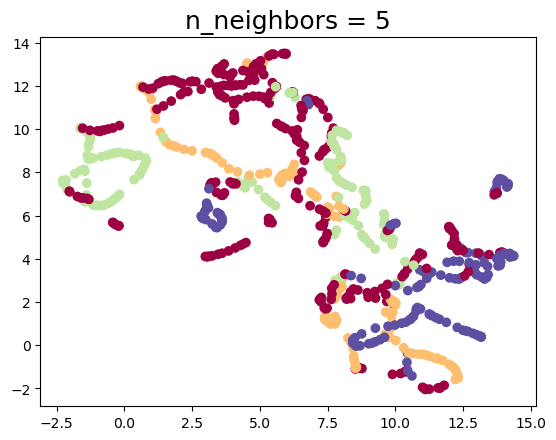

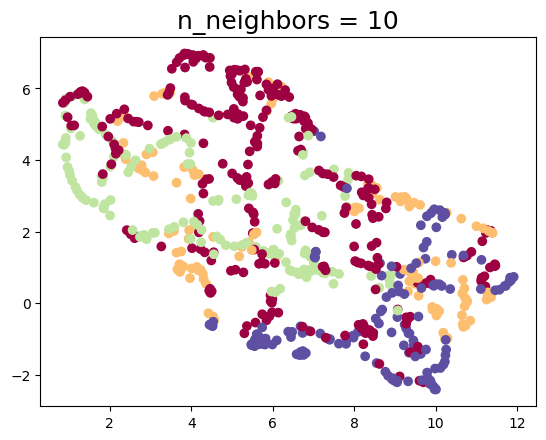

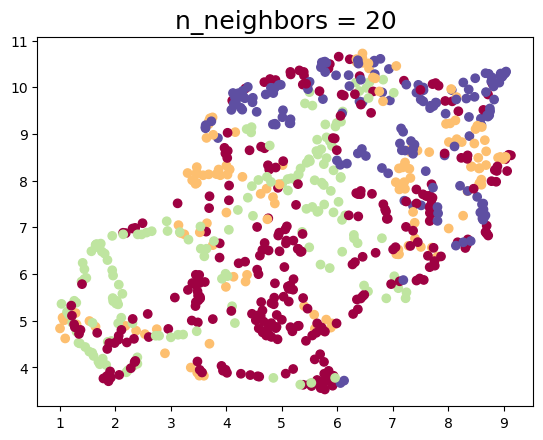

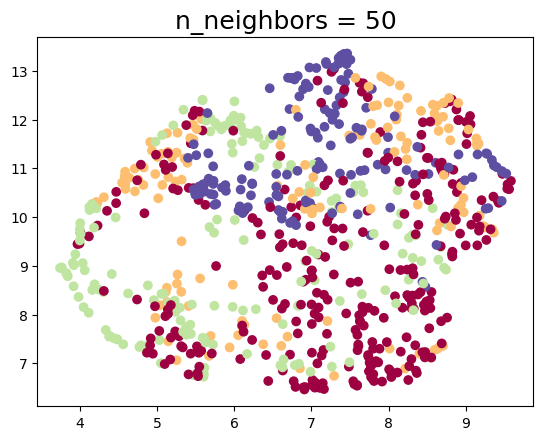

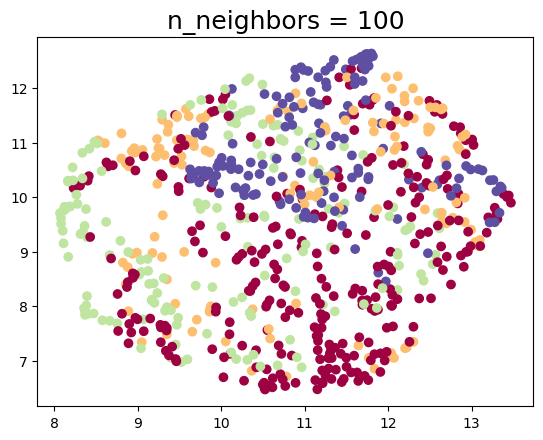

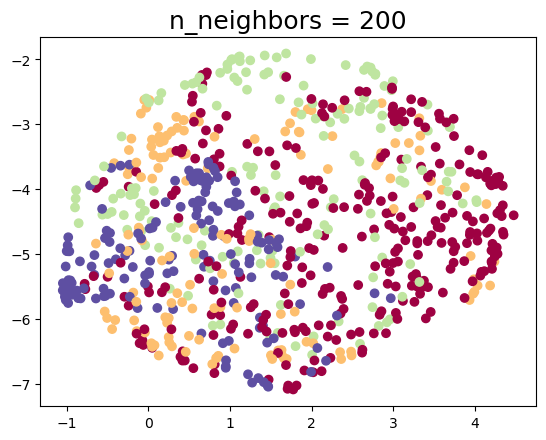

In [59]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

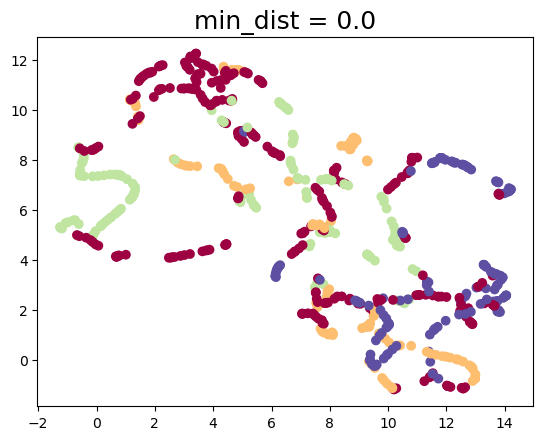

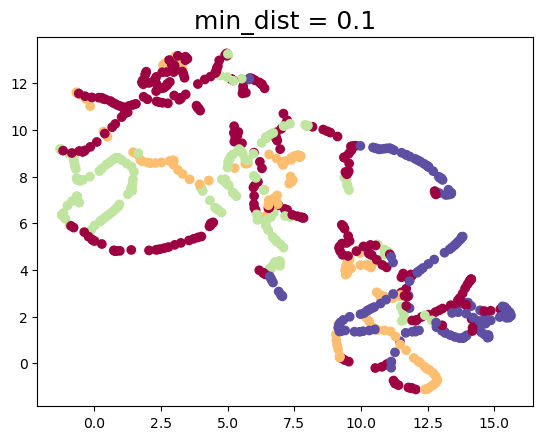

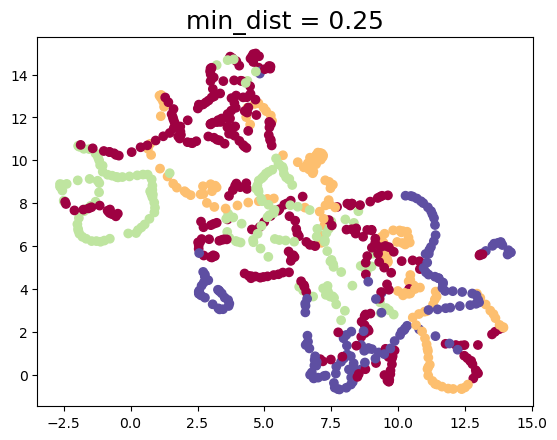

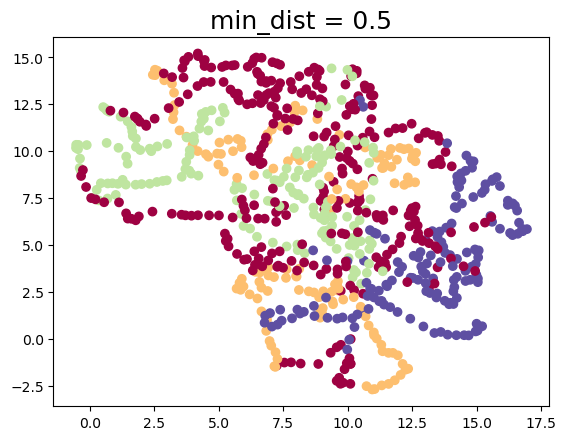

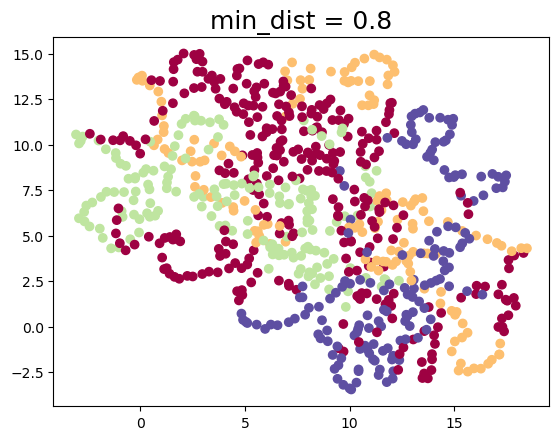

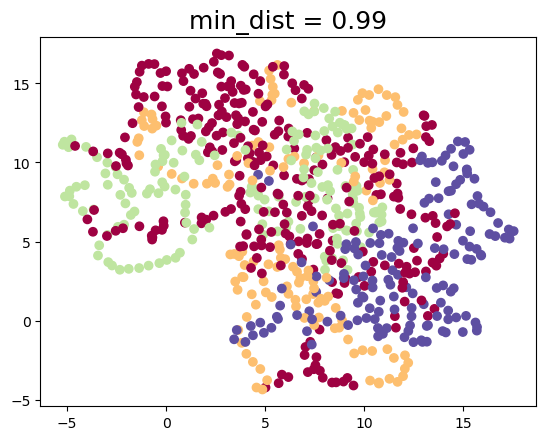

In [61]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d,n_neighbors=5, title='min_dist = {}'.format(d))

In [64]:
import numba

@numba.njit()
def red_channel_dist(a,b):
    return np.abs(a[0] - b[0])

@numba.njit()
def hue(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    delta = cmax - cmin
    if cmax == r:
        return ((g - b) / delta) % 6
    elif cmax == g:
        return ((b - r) / delta) + 2
    else:
        return ((r - g) / delta) + 4

@numba.njit()
def lightness(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    return (cmax + cmin) / 2.0

@numba.njit()
def saturation(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    chroma = cmax - cmin
    light = lightness(r, g, b)
    if light == 1:
        return 0
    else:
        return chroma / (1 - abs(2*light - 1))
    
@numba.njit()
def hue_dist(a, b):
    diff = (hue(a[0], a[1], a[2]) - hue(b[0], b[1], b[2])) % 6
    if diff < 0:
        return diff + 6
    else:
        return diff

@numba.njit()
def sl_dist(a, b):
    a_sat = saturation(a[0], a[1], a[2])
    b_sat = saturation(b[0], b[1], b[2])
    a_light = lightness(a[0], a[1], a[2])
    b_light = lightness(b[0], b[1], b[2])
    return (a_sat - b_sat)**2 + (a_light - b_light)**2

@numba.njit()
def hsl_dist(a, b):
    a_sat = saturation(a[0], a[1], a[2])
    b_sat = saturation(b[0], b[1], b[2])
    a_light = lightness(a[0], a[1], a[2])
    b_light = lightness(b[0], b[1], b[2])
    a_hue = hue(a[0], a[1], a[2])
    b_hue = hue(b[0], b[1], b[2])
    return (a_sat - b_sat)**2 + (a_light - b_light)**2 + (((a_hue - b_hue) % 6) / 6.0)

/home/eric/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1772: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/home/eric/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1772: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/home/eric/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/eric/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1772: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable

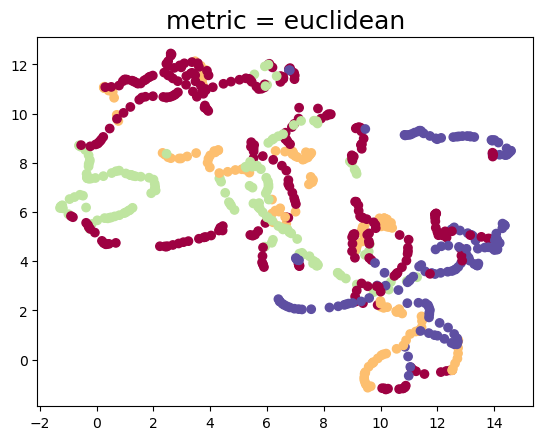

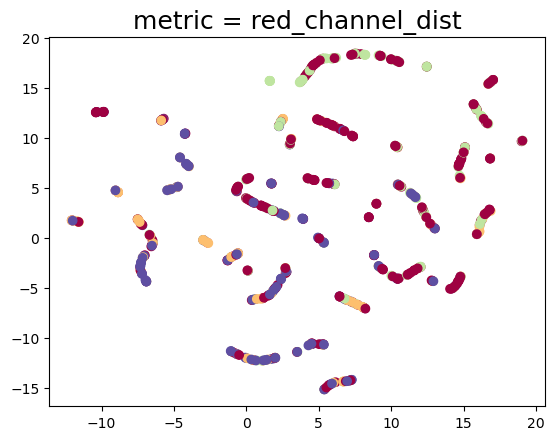

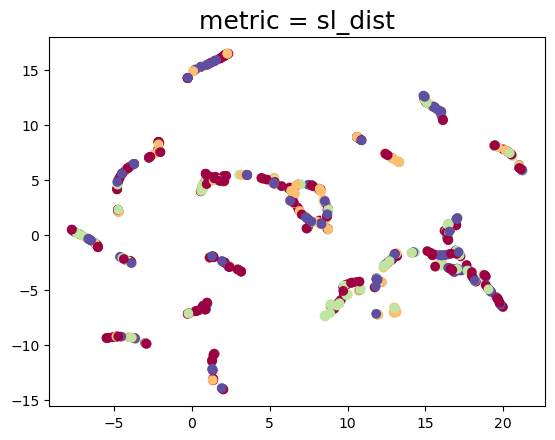

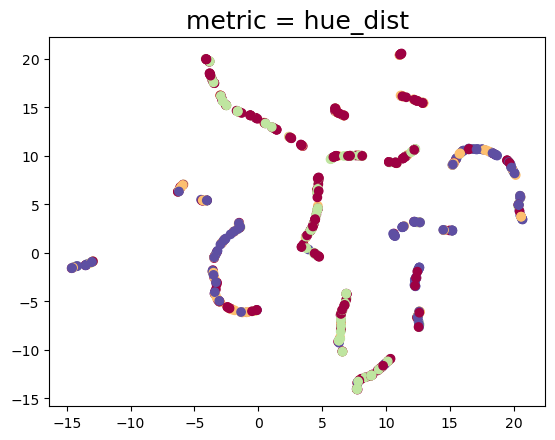

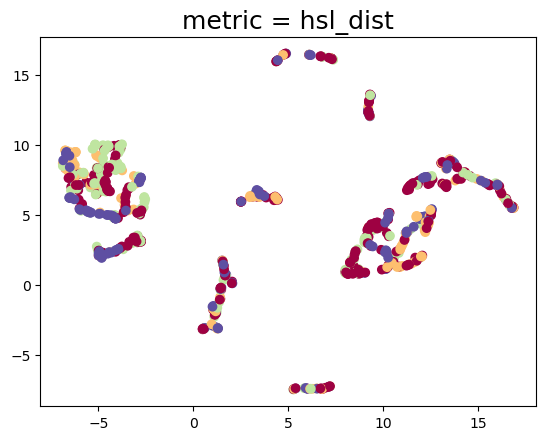

In [65]:
for m in ("euclidean", red_channel_dist, sl_dist, hue_dist, hsl_dist):
    name = m if type(m) is str else m.__name__
    draw_umap(n_components=2,n_neighbors=5, min_dist=0.1, metric=m, title='metric = {}'.format(name))

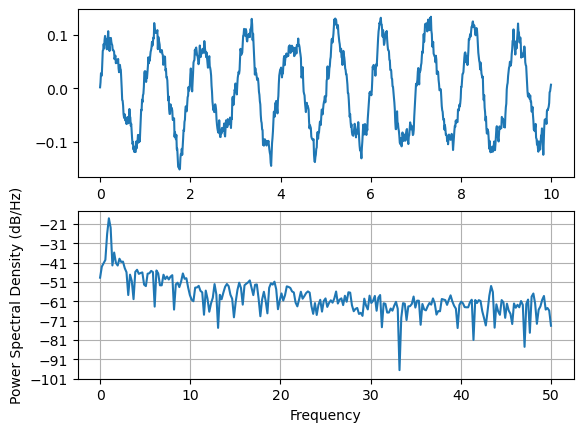

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
 
# set random state for reproducibility
np.random.seed(19695601)
 
diff = 0.01
ax = np.arange(0, 10, diff)
n = np.random.randn(len(ax))
by = np.exp(-ax / 0.05)
 
cn = np.convolve(n, by) * diff
cn = cn[:len(ax)]
s = 0.1 * np.sin(2 * np.pi * ax) + cn
 
plt.subplot(211)
plt.plot(ax, s)
plt.subplot(212)
plt.psd(s, 512, 1 / diff)
 
plt.show()